<a href="https://colab.research.google.com/github/endangrusiana123/SistemCerdas/blob/main/Tugas_Besar_Group_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Car Acceptibility Classification Using Random Forest
<center>

**Kelompok 3**

| No. | Nama |
|:-----:|:-----:|
|1|Mohammad Ariel Chandra Wibowo|
|2|Muhammad Rafli Al-Hasyimi|
|3|Muhammad Dafa Maulana|
|4|Endang Rusiana|
|5|Tia Fiendi A.|
|6|Iqbal Kurniawan P|

</center>

# Import Library

In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

Access Kaggle

In [24]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

Load dataset

In [25]:
#https://www.kaggle.com/datasets/kanyianalyst/car-evaluation-dataset
!kaggle datasets download -d kanyianalyst/car-evaluation-dataset
!unzip "car-evaluation-dataset.zip"

Dataset URL: https://www.kaggle.com/datasets/kanyianalyst/car-evaluation-dataset
License(s): CC0-1.0
car-evaluation-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  car-evaluation-dataset.zip
replace car evaluation_with.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Dataset preview

In [26]:
path = 'car evaluation_with.csv'
data = pd.read_csv(path)
data.head(20)

vhigh vhigh.1  2  2.1  small   med  unacc
0   vhigh   vhigh  2    2  small  high  unacc
1   vhigh   vhigh  2    2    med   low  unacc
2   vhigh   vhigh  2    2    med   med  unacc
3   vhigh   vhigh  2    2    med  high  unacc
4   vhigh   vhigh  2    2    big   low  unacc
5   vhigh   vhigh  2    2    big   med  unacc
6   vhigh   vhigh  2    2    big  high  unacc
7   vhigh   vhigh  2    4  small   low  unacc
8   vhigh   vhigh  2    4  small   med  unacc
9   vhigh   vhigh  2    4  small  high  unacc
10  vhigh   vhigh  2    4    med   low  unacc
11  vhigh   vhigh  2    4    med   med  unacc
12  vhigh   vhigh  2    4    med  high  unacc
13  vhigh   vhigh  2    4    big   low  unacc
14  vhigh   vhigh  2    4    big   med  unacc
15  vhigh   vhigh  2    4    big  high  unacc
16  vhigh   vhigh  2    5  small   low  unacc
17  vhigh   vhigh  2    5  small   med  unacc
18  vhigh   vhigh  2    5  small  high  unacc
19  vhigh   vhigh  2    5    med   low  unacc

Add Data Header

In [27]:
column_names=["buying","maint","doors", "persons", "lug_boot", "safety", "class"]
data.columns = column_names
data.head(20)

buying  maint  doors  persons lug_boot safety  class
0   vhigh  vhigh      2        2    small   high  unacc
1   vhigh  vhigh      2        2      med    low  unacc
2   vhigh  vhigh      2        2      med    med  unacc
3   vhigh  vhigh      2        2      med   high  unacc
4   vhigh  vhigh      2        2      big    low  unacc
5   vhigh  vhigh      2        2      big    med  unacc
6   vhigh  vhigh      2        2      big   high  unacc
7   vhigh  vhigh      2        4    small    low  unacc
8   vhigh  vhigh      2        4    small    med  unacc
9   vhigh  vhigh      2        4    small   high  unacc
10  vhigh  vhigh      2        4      med    low  unacc
11  vhigh  vhigh      2        4      med    med  unacc
12  vhigh  vhigh      2        4      med   high  unacc
13  vhigh  vhigh      2        4      big    low  unacc
14  vhigh  vhigh      2        4      big    med  unacc
15  vhigh  vhigh      2        4      big   high  unacc
16  vhigh  vhigh      2        5    small    low  unacc
17  vhigh  vhigh      2        5    small    med  unacc
18  vhigh  vhigh      2        5    small   high  unacc
19  vhigh  vhigh      2        5      med    low  unacc

**Data Composition of Quality Class**

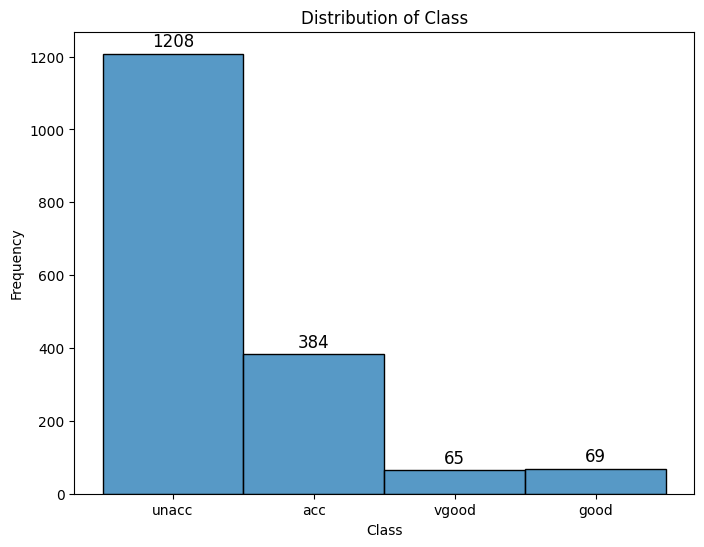

In [28]:
# Plotting histogram for the "class" column
plt.figure(figsize=(8, 6))
ax = sns.histplot(data["class"], discrete=True)

# Annotate bars with count values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Dataset Balancing

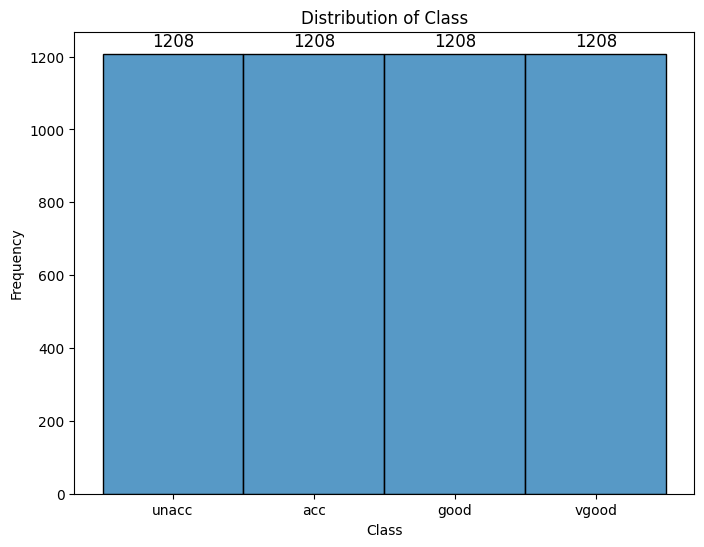

In [29]:
from sklearn.utils import resample

# Separate majority and minority classes
df_unacc = data[data['class'] == 'unacc']
df_acc = data[data['class'] == 'acc']
df_good = data[data['class'] == 'good']
df_vgood = data[data['class'] == 'vgood']

# Upsample minority classes
df_acc_upsampled = resample(df_acc,
                            replace=True,  # sample with replacement
                            n_samples=1208,  # to match majority class
                            random_state=123)  # reproducible results

df_good_upsampled = resample(df_good,
                             replace=True,
                             n_samples=1208,
                             random_state=123)

df_vgood_upsampled = resample(df_vgood,
                              replace=True,
                              n_samples=1208,
                              random_state=123)

# Combine majority class with upsampled minority classes
df_balanced = pd.concat([df_unacc, df_acc_upsampled, df_good_upsampled, df_vgood_upsampled])

# Plotting histogram for the "class" column
plt.figure(figsize=(8, 6))
ax = sns.histplot(df_balanced["class"], discrete=True)

# Annotate bars with count values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df_balanced.sample(30)

buying  maint  doors  persons lug_boot safety  class
753    high    med      5        5      big   high    acc
1448    low   high      3        5    small    med    acc
1685    low    low      4        4      med    med   good
561    high   high      2        5      med   high    acc
605    high   high      4        4      med    med    acc
1452    low   high      3        5      med   high  vgood
1424    low   high      2        5      med    med    acc
308   vhigh    med      5        4      med    med    acc
1506    low   high      5        5      med   high  vgood
1479    low   high      4        5      med   high  vgood
639    high   high      5        5    small   high    acc
1212    med    low      2        5      big   high  vgood
1586    low    med      4        5      med    med   good
1212    med    low      2        5      big   high  vgood
1275    med    low      5        2      big   high  unacc
1279    med    low      5        4      med    low  unacc
1142    med    med      4        4    small    med    acc
1152    med    med      4        5    small   high    acc
1535    low    med      2        5      big    med   good
1553    low    med      3        4      big    med   good
204   vhigh   high      5        4      big   high  unacc
1452    low   high      3        5      med   high  vgood
1284    med    low      5        4      big   high  vgood
237   vhigh    med      2        5      med   high    acc
1428    low   high      2        5      big   high  vgood
758    high    low      2        2      med    med  unacc
1500    low   high      5        4      big   high  vgood
645    high   high      5        5      big   high    acc
275   vhigh    med      4        2      big    med  unacc
1355    low  vhigh      4        2      big    med  unacc

# Split data for Validation and Test

**50% training, 25% Validation, and 25% Testing**

Presence of categorical string data need to be converted to numerical values before applying scaling or training the model.

In [33]:
# Define feature variables and target variable
X = df_balanced.drop(['class'], axis=1)
y = df_balanced['class']

# Convert categorical features to dummy variables
X = pd.get_dummies(X, drop_first=True)
print(X)

      doors  persons  buying_low  buying_med  buying_vhigh  maint_low  \
0         2        2       False       False          True      False   
1         2        2       False       False          True      False   
2         2        2       False       False          True      False   
3         2        2       False       False          True      False   
4         2        2       False       False          True      False   
...     ...      ...         ...         ...           ...        ...   
1581      4        4        True       False         False      False   
1644      2        5        True       False         False       True   
1158      4        5       False        True         False      False   
1506      5        5        True       False         False      False   
1536      2        5        True       False         False      False   

      maint_med  maint_vhigh  lug_boot_med  lug_boot_small  safety_low  \
0         False         True         False       

Split Dataset

In [34]:
# Split the dataset
# Data for training and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
# Data for testing
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Training and Validation Random Forest

**Scaler**

Standardizing the feature variables is a common preprocessing step in machine learning pipelines, especially for algorithms that are sensitive to the scale of input features, such as Support Vector Machines (SVM), k-Nearest Neighbors (k-NN), and neural networks.

However, after applying the StandardScaler, the data is transformed such that each feature has a mean of 0 and a standard deviation of 1, which helps in better training of machine learning models, especially those that are sensitive to the scale of input features.

In [35]:
# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

**Training and Validation**

Accuracy: 0.9892384105960265
Precision: 0.989543763005431
Recall: 0.9892384105960265
F1 Score: 0.9892325539716071
Classification Report:
              precision    recall  f1-score   support

         acc       0.96      1.00      0.98       314
        good       1.00      1.00      1.00       284
       unacc       1.00      0.96      0.98       306
       vgood       1.00      1.00      1.00       304

    accuracy                           0.99      1208
   macro avg       0.99      0.99      0.99      1208
weighted avg       0.99      0.99      0.99      1208



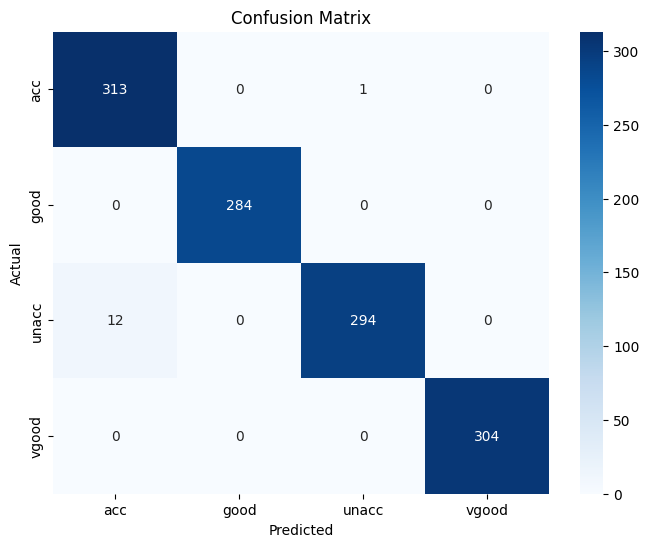

Feature Importances:
persons           0.144017
safety_med        0.132320
lug_boot_small    0.123954
safety_low        0.115907
buying_low        0.088775
maint_low         0.075061
doors             0.069900
buying_med        0.067605
maint_med         0.054137
maint_vhigh       0.049561
buying_vhigh      0.039409
lug_boot_med      0.039355
dtype: float64


In [41]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:")
print(classification_report(y_val, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
feature_importance = rf_classifier.feature_importances_
feature_names = X.columns
important_features = pd.Series(feature_importance, index=feature_names).sort_values(ascending=False)

print("Feature Importances:")
print(important_features)


# Random Forest Architecture

**Install required library**

In [42]:
!pip install graphviz
!apt-get install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


**Number of trees**

In [43]:
from sklearn.tree import export_graphviz
import graphviz

# Get the number of trees in the Random Forest
num_trees = len(rf_classifier.estimators_)
print(f"The Random Forest model has {num_trees} trees.")


The Random Forest model has 100 trees.


**Draw Single Tree From Random Forest**: 1st tree from 100 trees

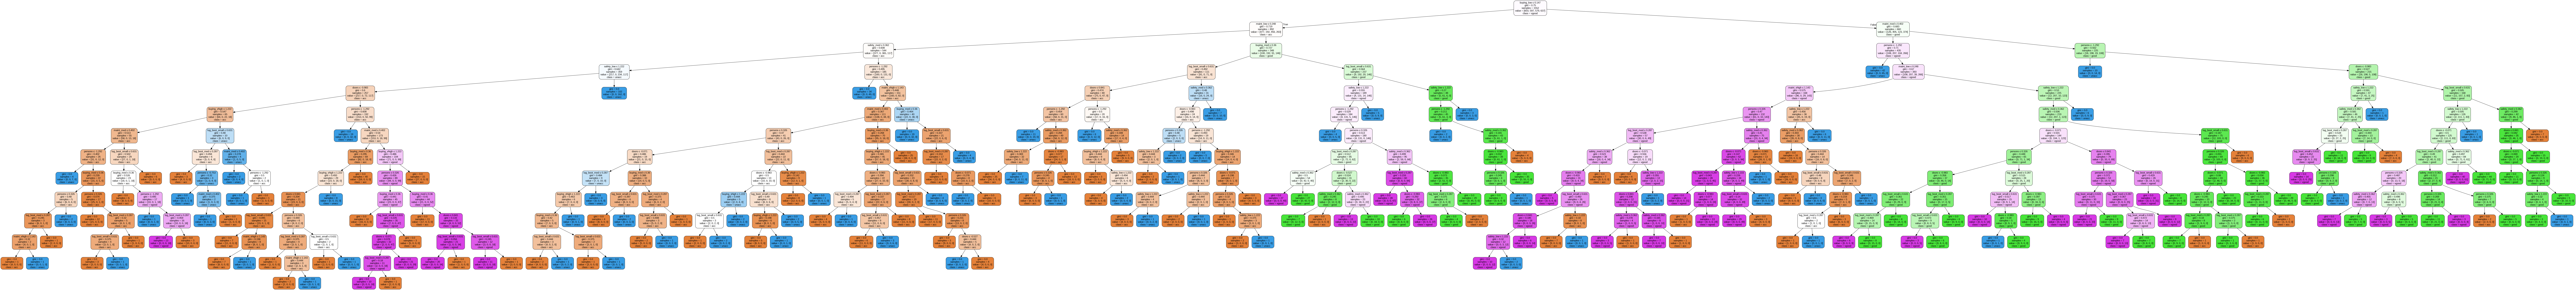

In [46]:
# Extract a single tree from the Random Forest
estimator = rf_classifier.estimators_[0] # 0:first tree model

# Export the tree to a dot file
dot_data = export_graphviz(estimator, out_file=None,
                           feature_names=X.columns,
                           class_names=rf_classifier.classes_,
                           filled=True, rounded=True,
                           special_characters=True)

# Convert the dot file to a graph
graph = graphviz.Source(dot_data)

# Render the graph to a PNG file
graph.render("random_forest_tree_1st", format='png')

# Display the PNG image in Colab
from IPython.display import Image
Image(filename='random_forest_tree_1st.png')

**Draw Single Tree From Random Forest**: 50th tree from 100 trees

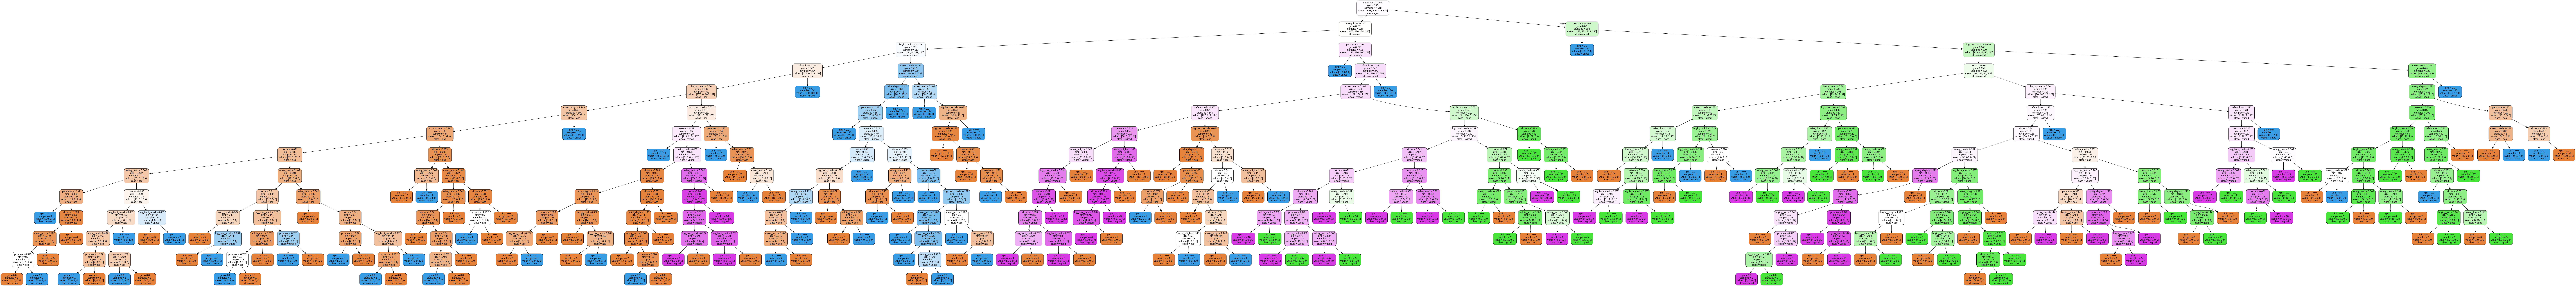

In [48]:
# Extract a single tree from the Random Forest
estimator = rf_classifier.estimators_[49]

# Export the tree to a dot file
dot_data = export_graphviz(estimator, out_file=None,
                           feature_names=X.columns,
                           class_names=rf_classifier.classes_,
                           filled=True, rounded=True,
                           special_characters=True)

# Convert the dot file to a graph
graph = graphviz.Source(dot_data)

# Render the graph to a PNG file
graph.render("random_forest_tree_50th", format='png')

# Display the PNG image in Colab
from IPython.display import Image
Image(filename='random_forest_tree_50th.png')

# Testing Random Forest

**Scaler**

In [49]:
# Standardize the feature variables
X_test = scaler.transform(X_test)

**Testing**

Accuracy Test: 0.9900662251655629
Precision Test: 0.9901593912842451
Recall Test: 0.9900662251655629
F1 Score Test: 0.9900639014829677
Classification Report Test:
              precision    recall  f1-score   support

         acc       0.97      0.99      0.98       302
        good       0.99      1.00      0.99       293
       unacc       1.00      0.97      0.99       319
       vgood       1.00      1.00      1.00       294

    accuracy                           0.99      1208
   macro avg       0.99      0.99      0.99      1208
weighted avg       0.99      0.99      0.99      1208



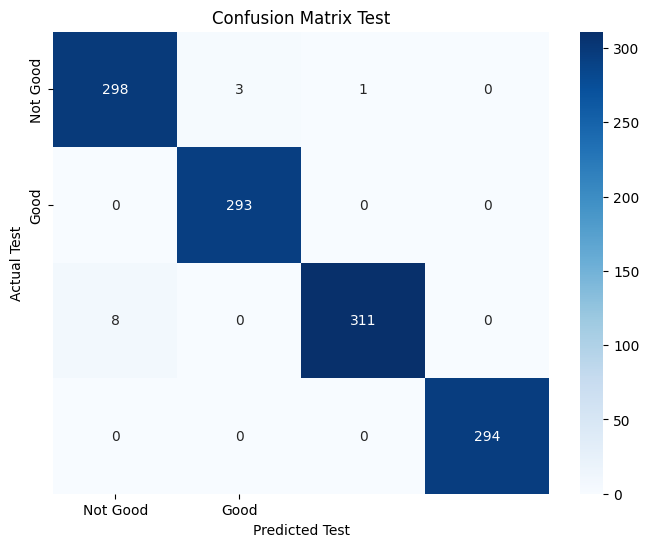

Feature Importances:
persons           0.144017
safety_med        0.132320
lug_boot_small    0.123954
safety_low        0.115907
buying_low        0.088775
maint_low         0.075061
doors             0.069900
buying_med        0.067605
maint_med         0.054137
maint_vhigh       0.049561
buying_vhigh      0.039409
lug_boot_med      0.039355
dtype: float64


In [51]:
# Make predictions
y_pred_test = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# Print the evaluation metrics
print("Accuracy Test:", accuracy_test)
print("Precision Test:", precision_test)
print("Recall Test:", recall_test)
print("F1 Score Test:", f1_test)

# Print the classification report
print("Classification Report Test:")
print(classification_report(y_test, y_pred_test))

# Compute the confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Good", "Good"], yticklabels=["Not Good", "Good"])
plt.xlabel('Predicted Test')
plt.ylabel('Actual Test')
plt.title('Confusion Matrix Test')
plt.show()

# Feature importance
feature_importance = rf_classifier.feature_importances_
feature_names = X.columns
important_features = pd.Series(feature_importance, index=feature_names).sort_values(ascending=False)

print("Feature Importances:")
print(important_features)


Pada gambar di atas, kita dapat melihat bahwa sebagian besar prediksi berada di sepanjang diagonal utama dari kiri atas ke kanan bawah. Ini menunjukkan bahwa model dengan baik membedakan antara kelas positif dan negatif. Jumlah false positive (FP) dan false negative (FN) sangat rendah, dan sebagian besar sampel diklasifikasikan dengan benar.

Contoh ini mencerminkan situasi di mana model memiliki tingkat akurasi yang tinggi, sensitivitas yang baik, dan spesifisitas yang tinggi. Model ini secara efektif mengidentifikasi baik kelas positif maupun kelas negatif, sehingga dapat dianggap sebagai contoh confusion matrix yang bagus.